# Analisis y Mezcla de los datos

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
#Read Data
DATA_NAME = 'resultados/resultados_parte{}.csv'
data_parts = [1,2,3,4,5,6,7]
csv_objects = []

for part in data_parts:
    csv_objects.append(pd.read_csv(DATA_NAME.format(part)))
    
    


In [3]:
#Join Data

data = csv_objects[1]

for csv_object in csv_objects[1:]:
    data = pd.merge(data, csv_object, how='outer')
    

In [4]:
# Preview data.
#data

##### Reordenar columnas

In [5]:
cols = [
    'title',
    'url',
    'description',
    'related_games',
    
    'genres',
    'platforms',

    'ign_score',
    'ign_score_phrase',
    'community_score',
    'community_score_phrase',
    
    'publisher',
    'developers',
    'rating_category',
    'rating_content',
    
    'release_date',
    'price',
    
    'review_link',
 ]

data = data[cols]    

##### Filtramos por Descripcion no nula. Algo mas?

In [6]:
# Filter empty description 
data = data[data.description.notnull()]
data = data[data.title.notnull() ]
data = data[data.url.notnull() ]

##### Limpiamos los simbolos no legibles de los datos.

In [7]:
data['description'] = data['description'].str.replace('\n\n', '')
data['description'] = data['description'].str.replace('\n', '')
data['description'] = data['description'].str.replace('\t', '')
data['description'] = data['description'].str.replace('\r', '')
data['description'] = data['description'].str.rstrip()
#data[160:170]

#with pd.option_context('display.max_rows', 100000, 'display.max_columns', 10000, 'display.max_colwidth', 10000000):
#    print(data[166:167])




##### Vereficamos que hay datos faltantes y luego los rellenamos con null.

In [8]:
#1537       False            False            True         False   True   
#print (data.isnull())

In [9]:
data = data.fillna(value="null")

In [10]:
#1537 	False 	False 	False 	False 	False 	False 	False 	False 	False 	False 	False 	False 	False 	False 	False 	False 	False

#data.isnull()

##### Guardamos los datos

In [11]:
# Save Data...
data.to_csv(os.getcwd() +'/resultados/all_data.csv', index = False, sep = "\t" )

## Histogramas (Ninguna utilidad practica...)

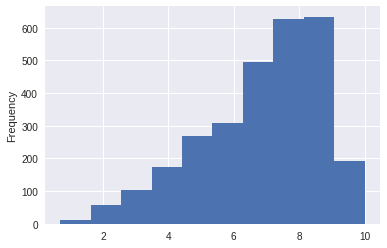

In [12]:
#Histograma de las notas de IGN.
data.ign_score.plot.hist()

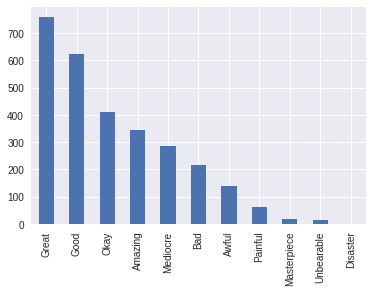

In [13]:
testdf = data
testdf.ign_score_phrase.value_counts().plot(kind='bar')

In [14]:
#Histograma de las notas de los usuarios.
data.community_score.plot.hist()


TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
testdf = data
testdf.community_score_phrase.value_counts().plot(kind='bar')

In [ ]:
# Histograma por Publisher
data.publisher.value_counts().plot(kind='bar')